## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os 
os.chdir(r"E:\Study\Course Docs\Kaggle Hackathon\Kaggle-Competitions-master")

In [2]:
#Functions to Check if columns are of Contineous or discrete variable based on the unique count 25.
def get_variable_type(element) :  
    if element==0:
        return "Not Known"
    elif element < 25 and element!=0 :
        return "Discrete"
    elif element >= 25 and element!=0 :
        return "Contineous" 
    
def get_meta_data(dataframe) :
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), 
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), 
                    'Null_Count': dataframe.isnull().sum().astype(int), 
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, 
                    'Unique_Values_Count': dataframe.nunique().astype(int) 
                     })
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Unique_Values_Count"].apply(get_variable_type).astype(str)
    return metadata_matrix

In [3]:
df=pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
df.shape,test_df.shape

((1460, 81), (1459, 80))

In [5]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
test_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [7]:
pd.set_option('display.max_rows', 100)
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [8]:
df = df.loc[:, df.isnull().mean() < .45]
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending=False)

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
TotalBsmtSF       0.00
BsmtFinSF2        0.00
EnclosedPor

In [9]:
dfx = get_meta_data(df)
dfx

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type
Id,int64,1460,0,0.000000,1460,Contineous
MSSubClass,int64,1460,0,0.000000,15,Discrete
MSZoning,object,1460,0,0.000000,5,Discrete
LotFrontage,float64,1201,259,17.739726,110,Contineous
LotArea,int64,1460,0,0.000000,1073,Contineous
Street,object,1460,0,0.000000,2,Discrete
LotShape,object,1460,0,0.000000,4,Discrete
LandContour,object,1460,0,0.000000,4,Discrete
Utilities,object,1460,0,0.000000,2,Discrete
LotConfig,object,1460,0,0.000000,5,Discrete


In [10]:
num_cols = dfx.loc[((dfx.Datatype != 'object') & (dfx.Variable_Type == 'Contineous'))].index.tolist()
cat_cols = dfx.loc[((dfx.Datatype == 'object') & (dfx.Variable_Type != 'Contineous'))].index.tolist()

In [11]:
yr_cols = ['YearBuilt','YearRemodAdd','GarageYrBlt']
for feature in yr_cols:      
    df[feature]=df['YrSold']-df[feature]

In [12]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']]

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0
...,...,...,...
1455,8,7,8.0
1456,32,22,32.0
1457,69,4,69.0
1458,60,14,60.0


In [13]:
df['MSZoning'] = df['MSZoning'].replace(['FV', 'RH', 'C (all)'], 'Others')
df['Street'] = df['Street'].replace(['Grvl'], 'Pave')
df['LotShape'] = df['LotShape'].replace(['IR2','IR3'], 'Others')
df['LandContour'] = df['LandContour'].replace(['Bnk','HLS','Low'], 'Others')
df['Utilities'] = df['Utilities'].replace(['NoSeWa'], 'AllPub')
df['LotConfig'] = df['LotConfig'].replace(['FR2','FR3'], 'Others')
df['LandSlope'] = df['LandSlope'].replace(['Sev'], 'Mod')
df['Condition1'] = df['Condition1'].replace(['Feedr','Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'], 'Others')
df['Condition2'] = df['Condition2'].replace(['Feedr','Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'], 'Others')
df['BldgType'] = df['BldgType'].replace(['2fmCon','Twnhs'], 'Others')
df['HouseStyle'] = df['HouseStyle'].replace(['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'], 'Others')
df['RoofStyle'] = df['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'], 'Others')
df['RoofMatl'] = df['RoofMatl'].replace(['Tar&Grv','WdShngl','WdShake','Membran','Metal','Roll','ClyTile'], 'Others')
df['Exterior1st'] = df['Exterior1st'].replace(['BrkComm','Stone','CBlock','AsphShn','ImStucc'], 'Others')
df['Exterior2nd'] = df['Exterior2nd'].replace(['BrkComm','Stone','CBlock','AsphShn','ImStucc','Brk Cmn','Other'], 'Others')
df['ExterCond'] = df['ExterCond'].replace(['Fa','Ex','Po'], 'Others')
df['Foundation'] = df['Foundation'].replace(['Slab','Stone','Wood'], 'Others')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(['BLQ','ALQ','Rec','LwQ','GLQ'], 'Others')
df['Heating'] = df['Heating'].replace(['GasW','Grav','Wall','OthW','Floor'], 'Others')
df['HeatingQC'] = df['HeatingQC'].replace(['Fa','Po'], 'Others')
df['Electrical'] = df['Electrical'].replace(['FuseF','FuseP','Mix'], 'Others')
df['Functional'] = df['Functional'].replace(['Min1','Min2','Maj1','Maj2','Mod','Sev'], 'Others')
df['GarageType'] = df['GarageType'].replace(['Basment','CarPort','2Types'], 'Others')
df['GarageQual'] = df['GarageQual'].replace(['Fa','Gd','Ex','Po'], 'Others')
df['GarageCond'] = df['GarageCond'].replace(['Fa','Gd','Ex','Po'], 'Others')	
df['SaleType'] = df['SaleType'].replace(['ConLD','ConLw','ConLI','CWD','Oth','Con'], 'Others')
df['SaleCondition'] = df['SaleCondition'].replace(['Family','Alloca','AdjLand'], 'Others')

In [14]:
## Fill Missing Values for numerical columns
for fet in num_cols:
    df[fet]=df[fet].fillna(df[fet].median())
## Fill Missing Values for categorical columns
for fet in cat_cols:
    df[fet]=df[fet].fillna(df[fet].mode()[0])

In [15]:
get_meta_data(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type
Id,int64,1460,0,0.0,1460,Contineous
MSSubClass,int64,1460,0,0.0,15,Discrete
MSZoning,object,1460,0,0.0,3,Discrete
LotFrontage,float64,1460,0,0.0,110,Contineous
LotArea,int64,1460,0,0.0,1073,Contineous
Street,object,1460,0,0.0,1,Discrete
LotShape,object,1460,0,0.0,3,Discrete
LandContour,object,1460,0,0.0,2,Discrete
Utilities,object,1460,0,0.0,1,Discrete
LotConfig,object,1460,0,0.0,4,Discrete


In [16]:
pd.set_option('display.max_columns', 100)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Others,Gtl,Veenker,Others,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,Others,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
onehot_cols = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','RoofStyle','RoofMatl','Exterior1st',
'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical',
'KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','SaleType','SaleCondition','BldgType','HouseStyle','CentralAir','PavedDrive']

minmax_cols = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
'2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
'GarageCars','GarageArea','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']


In [18]:
test_df = test_df.loc[:, test_df.isnull().mean() < .45]
dfy = get_meta_data(test_df)

In [19]:
num_colsx = dfy.loc[((dfy.Datatype != 'object') & (dfy.Variable_Type == 'Contineous'))].index.tolist()
cat_colsx = dfy.loc[((dfy.Datatype == 'object') & (dfy.Variable_Type != 'Contineous'))].index.tolist()

In [20]:
yr_colsx = ['YearBuilt','YearRemodAdd','GarageYrBlt']
for feature in yr_colsx:      
    test_df[feature]=test_df['YrSold']-test_df[feature]

In [21]:
test_df['MSZoning'] = test_df['MSZoning'].replace(['FV', 'RH', 'C (all)'], 'Others')
test_df['Street'] = test_df['Street'].replace(['Grvl'], 'Pave')
test_df['LotShape'] = test_df['LotShape'].replace(['IR2','IR3'], 'Others')
test_df['LandContour'] = test_df['LandContour'].replace(['Bnk','HLS','Low'], 'Others')
test_df['Utilities'] = test_df['Utilities'].replace(['NoSeWa'], 'AllPub')
test_df['LotConfig'] = test_df['LotConfig'].replace(['FR2','FR3'], 'Others')
test_df['LandSlope'] = test_df['LandSlope'].replace(['Sev'], 'Mod')
test_df['Condition1'] = test_df['Condition1'].replace(['Feedr','Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'], 'Others')
test_df['Condition2'] = test_df['Condition2'].replace(['Feedr','Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'], 'Others')
test_df['BldgType'] = test_df['BldgType'].replace(['2fmCon','Twnhs'], 'Others')
test_df['HouseStyle'] = test_df['HouseStyle'].replace(['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'], 'Others')
test_df['RoofStyle'] = test_df['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'], 'Others')
test_df['RoofMatl'] = test_df['RoofMatl'].replace(['Tar&Grv','WdShngl','WdShake','Membran','Metal','Roll','ClyTile'], 'Others')
test_df['Exterior1st'] = test_df['Exterior1st'].replace(['BrkComm','Stone','CBlock','AsphShn','ImStucc'], 'Others')
test_df['Exterior2nd'] = test_df['Exterior2nd'].replace(['BrkComm','Stone','CBlock','AsphShn','ImStucc','Brk Cmn','Other'], 'Others')
test_df['ExterCond'] = test_df['ExterCond'].replace(['Fa','Ex','Po'], 'Others')
test_df['Foundation'] = test_df['Foundation'].replace(['Slab','Stone','Wood'], 'Others')
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].replace(['BLQ','ALQ','Rec','LwQ','GLQ'], 'Others')
test_df['Heating'] = test_df['Heating'].replace(['GasW','Grav','Wall','OthW','Floor'], 'Others')
test_df['HeatingQC'] = test_df['HeatingQC'].replace(['Fa','Po'], 'Others')
test_df['Electrical'] = test_df['Electrical'].replace(['FuseF','FuseP','Mix'], 'Others')
test_df['Functional'] = test_df['Functional'].replace(['Min1','Min2','Maj1','Maj2','Mod','Sev'], 'Others')
test_df['GarageType'] = test_df['GarageType'].replace(['Basment','CarPort','2Types'], 'Others')
test_df['GarageQual'] = test_df['GarageQual'].replace(['Fa','Gd','Ex','Po'], 'Others')
test_df['GarageCond'] = test_df['GarageCond'].replace(['Fa','Gd','Ex','Po'], 'Others')	
test_df['SaleType'] = test_df['SaleType'].replace(['ConLD','ConLw','ConLI','CWD','Oth','Con'], 'Others')
test_df['SaleCondition'] = test_df['SaleCondition'].replace(['Family','Alloca','AdjLand'], 'Others')

In [22]:
## Fill Missing Values for numerical columns
for fet in num_colsx:
    test_df[fet]=test_df[fet].fillna(test_df[fet].median())
## Fill Missing Values for categorical columns
for fet in cat_colsx:
    test_df[fet]=test_df[fet].fillna(test_df[fet].mode()[0])

In [23]:
final_df=pd.concat([df,test_df],axis=0,sort=False)

In [24]:
final_df.shape

(2919, 76)

In [25]:
df_dum = pd.get_dummies(final_df[onehot_cols], drop_first=True)
# Drop categorical variable columns
final_df = final_df.drop((onehot_cols), axis=1)
# Concatenate dummy variables with X
final_df = pd.concat([final_df, df_dum], axis=1)
# Let's check the first few rows
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LandContour_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,LandSlope_Mod,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_Others,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,Electrical_Others,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_BuiltIn,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,BldgType_Duplex,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,CentralAir_Y,PavedDrive_P,PavedDrive_Y
0,1,60,65.0,8450,7,5,5,5,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,5.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1
1,2,20,80.0,9600,6,8,31,31,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,31.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,1,0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1
2,3,60,68.0,11250,7,5,7,6,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,7.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1
3,4,70,60.0,9550,7,5,91,36,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,8.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
4,5,60,84.0,14260,8,5,8,8,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,8.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1


In [26]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [27]:
df_Train.shape,df_Test.shape

((1460, 154), (1459, 154))

In [28]:
from sklearn.model_selection import train_test_split
y = df_Train["SalePrice"]
X = df_Train.drop(["SalePrice","Id"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [29]:
from sklearn.preprocessing import MinMaxScaler
cols = list(X_train.columns)
scaler = MinMaxScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LandContour_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,LandSlope_Mod,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_Others,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,Electrical_Others,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_BuiltIn,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,BldgType_Duplex,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,CentralAir_Y,PavedDrive_P,PavedDrive_Y
632,0.000000,0.219178,0.049545,0.666667,0.428571,0.235294,0.540984,0.130625,0.145641,0.0,0.241438,0.226841,0.247132,0.000000,0.0,0.202901,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.299065,0.5,0.383639,0.260870,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.272727,0.75,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
208,0.235294,0.164384,0.061062,0.666667,0.428571,0.139706,0.311475,0.080000,0.188696,0.0,0.039384,0.189362,0.194126,0.471154,0.0,0.325546,0.333333,0.0,0.666667,0.5,0.375,0.5,0.416667,0.333333,0.177570,0.5,0.320169,0.081522,0.100548,0.0,0.0,0.320833,0.0,0.000000,0.272727,0.25,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
83,0.000000,0.202055,0.035486,0.444444,0.428571,0.345588,0.786885,0.041250,0.000000,0.0,0.455908,0.174304,0.167737,0.000000,0.0,0.137717,0.000000,0.0,0.333333,0.5,0.375,0.5,0.333333,0.000000,0.308411,0.5,0.325106,0.100543,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.545455,0.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1174,0.294118,0.202055,0.071327,0.555556,0.857143,0.544118,0.934426,0.000000,0.089121,0.0,0.192209,0.155810,0.191831,0.627671,0.0,0.378862,0.000000,0.0,0.666667,0.5,0.500,0.5,0.583333,0.333333,0.691589,0.5,0.253879,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.545455,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
250,0.058824,0.116438,0.018930,0.222222,0.000000,0.514706,0.737705,0.000000,0.000000,0.0,0.311644,0.119149,0.223038,0.000000,0.0,0.183120,0.000000,0.0,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.261682,0.0,0.000000,0.357337,0.000000,0.0,0.0,0.000000,0.0,0.029032,0.363636,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.

In [30]:
X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LandContour_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,LandSlope_Mod,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_Others,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,Electrical_Others,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_BuiltIn,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,BldgType_Duplex,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,CentralAir_Y,PavedDrive_P,PavedDrive_Y
258,0.235294,0.202055,0.052046,0.666667,0.428571,0.051471,0.131148,0.107500,0.063962,0.000000,0.257705,0.157610,0.144332,0.442842,0.000000,0.274680,0.000000,0.0,0.666667,0.5,0.375,0.5,0.416667,0.333333,0.065421,0.50,0.397743,0.000000,0.175503,0.0,0.482283,0.0,0.0,0.0,0.363636,0.50,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
267,0.323529,0.133562,0.033186,0.444444,0.857143,0.507353,0.196721,0.000000,0.066974,0.000000,0.146404,0.117840,0.164754,0.384615,0.734266,0.350038,0.000000,0.0,0.666667,0.5,0.500,0.5,0.500000,0.333333,0.644860,0.25,0.169252,0.355978,0.043876,0.0,0.000000,0.0,0.0,0.0,0.545455,0.50,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
288,0.000000,0.164384,0.039819,0.444444,0.428571,0.316176,0.721311,0.019375,0.079731,0.000000,0.184932,0.144354,0.129876,0.000000,0.000000,0.106631,0.000000,0.0,0.333333,0.0,0.375,0.5,0.250000,0.000000,0.373832,0.25,0.197461,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.090909,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
649,0.941176,0.000000,0.002973,0.333333,0.571429,0.272059,0.622951,0.000000,0.023210,0.338535,0.000000,0.103110,0.067921,0.000000,0.000000,0.055765,0.333333,0.0,0.333333,0.0,0.125,0.5,0.083333,0.000000,0.261682,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.25,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1233,0.000000,0.164384,0.050761,0.444444,0.428571,0.375000,0.852459,0.112500,0.177179,0.000000,0.080479,0.194435,0.195961,0.000000,0.000000,0.160889,0.333333,0.0,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.476636,0.50,0.374471,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.363636,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0

## Prediciton and selecting the Algorithm

r2: 0.8609652094641826
MAE: 20214.041215916193
MSE: 992750507.3129272
RMSE: 31507.94355893331


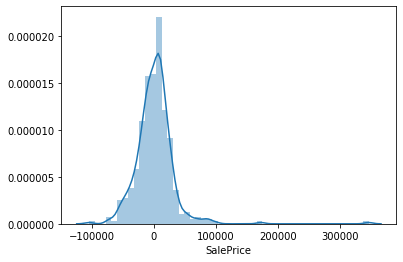

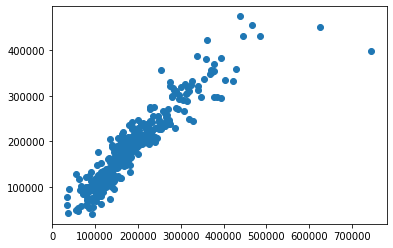

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

lm = LinearRegression()
lm.fit(X_train,y_train)

prediction=lm.predict(X_test)
print('r2:', metrics.r2_score(y_test, prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

sns.distplot(y_test-prediction)
plt.show()
plt.scatter(y_test,prediction)
plt.show()

{'alpha': 10}
0.8201842014013321
r2: 0.8644946649373813
MAE: 18766.829309910892
MSE: 967549126.4351418
RMSE: 31105.45171565817


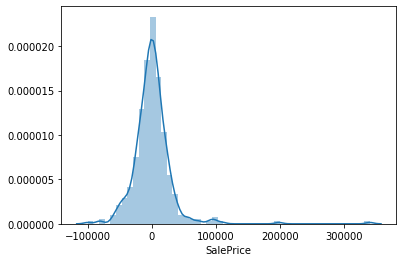

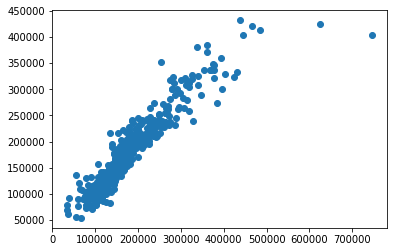

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

y_pred_ri=ridge_regressor.predict(X_test)
print('r2:', metrics.r2_score(y_test, y_pred_ri))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_ri))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_ri))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ri)))

sns.distplot(y_test-y_pred_ri)
plt.show()
plt.scatter(y_test,y_pred_ri)
plt.show()

{'alpha': 40}
0.7974920559049521
r2: 0.8737394795374012
MAE: 19055.715014287063
MSE: 901538350.6515126
RMSE: 30025.628230755017


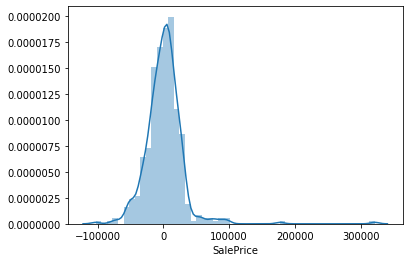

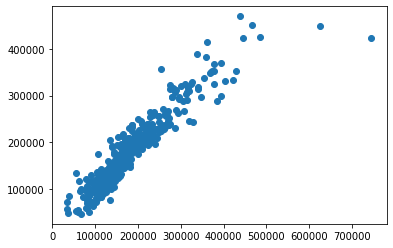

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
y_pred_ls=lasso_regressor.predict(X_test)
print('r2:', metrics.r2_score(y_test, y_pred_ls))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_ls))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_ls))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls)))
sns.distplot(y_test-y_pred_ls)
plt.show()
plt.scatter(y_test,y_pred_ls)
plt.show()

Text(0, 0.5, 'Accuracy Rate')

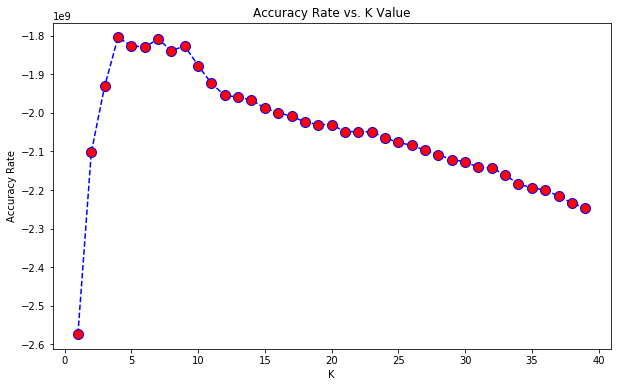

In [34]:
from sklearn.neighbors import KNeighborsRegressor
accuracy_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

# Plot the graph and decide neighbours based on the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

r2: 0.7315516584135773
MAE: 27624.700000000004
MSE: 1916802451.1719635
RMSE: 43781.30252941275


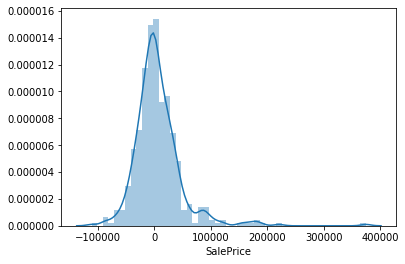

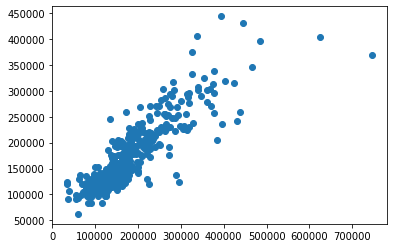

In [35]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_kn = knn.predict(X_test)
from sklearn import metrics
print('r2:', metrics.r2_score(y_test, y_pred_kn))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_kn))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_kn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_kn)))
sns.distplot(y_test-y_pred_kn)
plt.show()
plt.scatter(y_test,y_pred_kn)
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 243 out of 250 | elapsed:    9.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.9s finished


{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 1, 'max_leaf_nodes': 10, 'max_features': None, 'max_depth': 8, 'criterion': 'mse'}
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.1, presort='deprecated',
                      random_state=None, splitter='best')
r2: 0.6718125217144638
MAE: 31558.123829588225
MSE: 2343357977.5688133
RMSE: 48408.242868015914


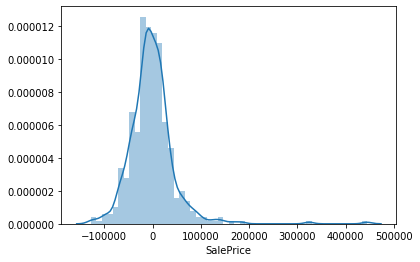

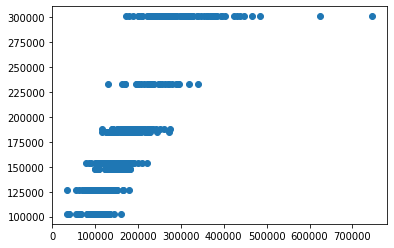

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
dtree=DecisionTreeRegressor()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)
params={
  "criterion" :['mse','mae'],
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]   
}
ran_search=RandomizedSearchCV(dtree,param_distributions=params,n_iter=50,n_jobs=-1,cv=folds,verbose=3)
ran_search.fit(X_train,y_train)
print(ran_search.best_params_)
print(ran_search.best_estimator_)
dtc=ran_search.best_estimator_            # Take the parameters from estimators
dtc.fit(X_train,y_train)
y_pred_dt=dtc.predict(X_test)
from sklearn import metrics
print('r2:', metrics.r2_score(y_test, y_pred_dt))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))
sns.distplot(y_test-y_pred_dt)
plt.show()
plt.scatter(y_test,y_pred_dt)
plt.show()

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
ran_search=RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = folds, verbose=2, random_state=42, n_jobs = 1)

r2: 0.8676406626604763
MAE: 18551.33553698037
MSE: 945085750.0127968
RMSE: 30742.246990303047


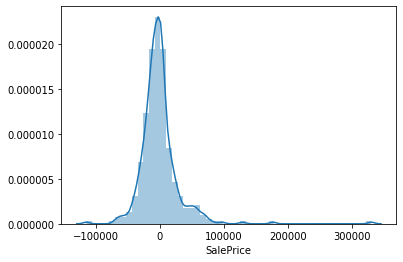

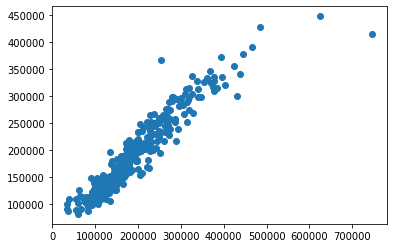

In [40]:
ran_search.fit(X_train,y_train) 
y_pred_rf=ran_search.predict(X_test)
print('r2:', metrics.r2_score(y_test, y_pred_rf))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
sns.distplot(y_test-y_pred_rf)
plt.show()
plt.scatter(y_test,y_pred_rf)
plt.show()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  8.5min finished


[19:43:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2: 0.8978609121122686
MAE: 16924.264073202055
MSE: 729304017.5502212
RMSE: 27005.629367785918


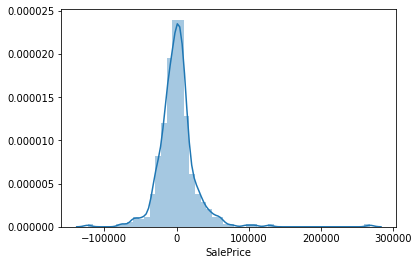

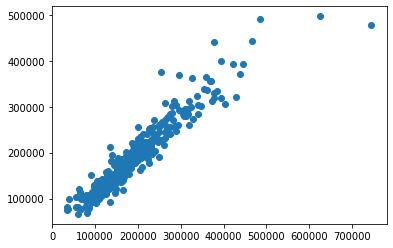

In [41]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost
## Hyper Parameter Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 101)
xg=xgboost.XGBRegressor()
ran_search=RandomizedSearchCV(xg,param_distributions=params,n_iter=100,n_jobs=-1,cv=folds,verbose=3)
ran_search.fit(X_train,y_train)
y_pred_xg = ran_search.predict(X_test)
print('r2:', metrics.r2_score(y_test, y_pred_xg))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xg))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xg)))
sns.distplot(y_test-y_pred_xg)
plt.show()
plt.scatter(y_test,y_pred_xg)
plt.show()

In [42]:
X = df_Test.drop(["Id",'SalePrice'],axis=1)
cols = list(X.columns)
X[cols] = scaler.transform(X[cols])
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LandContour_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,LandSlope_Mod,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_Others,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,Electrical_Others,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_BuiltIn,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,BldgType_Duplex,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,CentralAir_Y,PavedDrive_P,PavedDrive_Y
0,0.000000,0.202055,0.048246,0.444444,0.571429,0.360294,0.819672,0.0000,0.082920,0.097693,0.115582,0.144354,0.128958,0.000000,0.0,0.105878,0.0,0.0,0.333333,0.0,0.250,0.5,0.250000,0.000000,0.457944,0.25,0.514810,0.190217,0.000000,0.0,0.0,0.25,0.0,0.000000,0.454545,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.000000,0.205479,0.060609,0.555556,0.571429,0.382353,0.868852,0.0675,0.163536,0.000000,0.173801,0.217512,0.228316,0.000000,0.0,0.187453,0.0,0.0,0.333333,0.5,0.375,0.5,0.333333,0.000000,0.485981,0.25,0.220028,0.533967,0.065814,0.0,0.0,0.00,0.0,0.806452,0.454545,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.235294,0.181507,0.058566,0.444444,0.428571,0.095588,0.213115,0.0000,0.140149,0.000000,0.058647,0.151882,0.136301,0.374466,0.0,0.243971,0.0,0.0,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.121495,0.50,0.339915,0.288043,0.062157,0.0,0.0,0.00,0.0,0.000000,0.181818,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.235294,0.195205,0.040562,0.555556,0.571429,0.088235,0.213115,0.0125,0.106662,0.000000,0.138699,0.151555,0.135842,0.362179,0.0,0.239261,0.0,0.0,0.666667,0.5,0.375,0.5,0.416667,0.333333,0.112150,0.50,0.331453,0.489130,0.065814,0.0,0.0,0.00,0.0,0.000000,0.454545,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.588235,0.075342,0.017318,0.777778,0.428571,0.132353,0.311475,0.0000,0.046598,0.000000,0.435360,0.209493,0.217072,0.000000,0.0,0.178222,0.0,0.0,0.666667,0.0,0.250,0.5,0.250000,0.000000,0.168224,0.50,0.356841,0.000000,0.149909,0.0,0.0,0.30,0.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.

In [43]:
X.shape

(1459, 152)

In [44]:
y_pred_xgt = ran_search.predict(X)
y_pred_xgt

array([121790.234, 159027.73 , 189548.02 , ..., 165556.22 , 129307.55 ,
       224462.28 ], dtype=float32)

In [45]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred_xgt)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submissiony.csv',index=False)